# Clustering

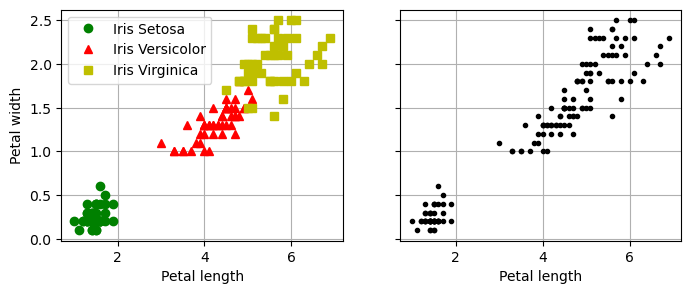

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris=load_iris()
X=iris.data
y=iris.target

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.plot(X[y==0,2],X[y==0,3],"go",label="Iris Setosa")
plt.plot(X[y==1,2],X[y==1,3],"r^",label="Iris Versicolor")
plt.plot(X[y==2,2],X[y==2,3],"ys",label="Iris Virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(X[:,2],X[:,3],"k.")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

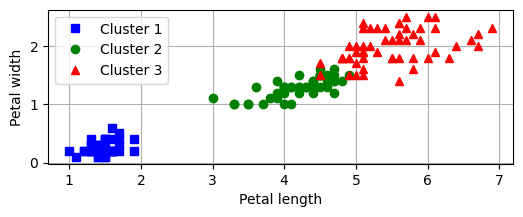

In [4]:
from sklearn.mixture import GaussianMixture
from scipy import stats
import numpy as np

y_pred=GaussianMixture(n_components=3,random_state=42).fit(X).predict(X)

mapping={}

for class_id in np.unique(y):
    mode,_=stats.mode(y_pred[y==class_id])
    mapping[mode]=class_id

y_pred=np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.figure(figsize=(6,2))

plt.plot(X[y_pred==0,2],X[y_pred==0,3],"bs",label="Cluster 1")
plt.plot(X[y_pred==1,2],X[y_pred==1,3],"go",label="Cluster 2")
plt.plot(X[y_pred==2,2],X[y_pred==2,3],"r^",label="Cluster 3")
plt.grid()
plt.legend()
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()



In [5]:

(y_pred==y).sum()/len(y_pred)

0.9666666666666667

In [6]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

blob_centers=np.array([[0.5,1.7],[-0.5,2.6],[-2.4,1.9],[-2.8,2.8],[-1.2,2.3]])
blob_std=np.array([0.4,0.2,0.2,0.1,0.1])
X,y=make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std,random_state=8)
k=5
kmeans=KMeans(n_clusters=k,random_state=42)
y_pred=kmeans.fit_predict(X)

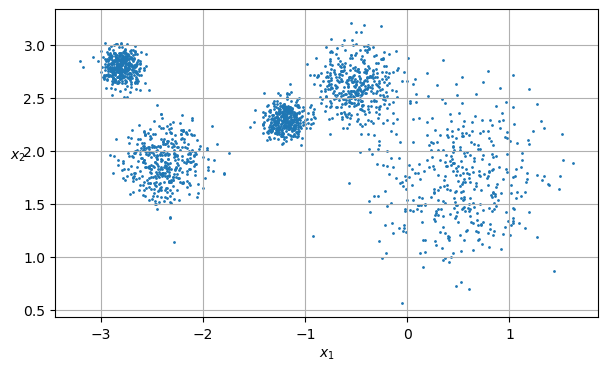

In [7]:


def plot_clusters(X,y=None):
    plt.scatter(X[:,0],X[:,1],s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$",rotation=0)

plt.figure(figsize=(7,4))
plot_clusters(X)
plt.grid()

In [8]:
y_pred

array([4, 2, 1, ..., 1, 3, 4], dtype=int32)

In [9]:
kmeans.labels_


array([4, 2, 1, ..., 1, 3, 4], dtype=int32)

In [10]:
kmeans.labels_ is y_pred

True

In [11]:
kmeans.cluster_centers_

array([[ 0.55649348,  1.69251263],
       [-2.3870964 ,  1.89135143],
       [-1.18787608,  2.29182972],
       [-2.80250024,  2.79039767],
       [-0.46640576,  2.60391412]])

In [12]:
X_new=np.array([[0.4,2],[-0.3,2.2]])

In [13]:
kmeans.predict(X_new)

array([0, 4], dtype=int32)

### Decision Boundaries

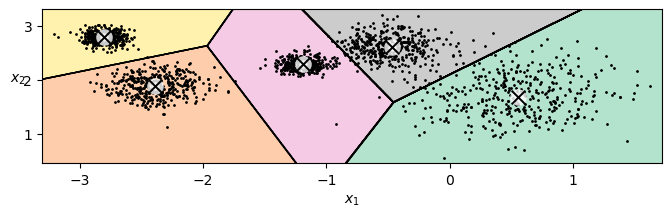

In [15]:
def plot_data(X):
    plt.plot(X[:,0],X[:,1],"k.",markersize=2)
    
def plot_centroids(centroids,weights=None,circle_color="w",cross_color="k"):
    if weights is not None:
        centroids=centroids[weights>weights.max()/10]
    plt.scatter(centroids[:,0],centroids[:,1],
               marker="o",
               s=35,
               linewidths=6,
               color=circle_color,
               zorder=10,
               alpha=0.8)
    plt.scatter(centroids[:,0],centroids[:,1],
               marker="x",
               s=1,
               linewidths=14,
               color=cross_color,
               zorder=11,
               alpha=1)
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 2))
plot_decision_boundaries(kmeans, X)


    

### Hard Clustering vs Soft Clustering

In [17]:
kmeans.transform(X_new).round(2)

array([[0.35, 2.79, 1.61, 3.3 , 1.06],
       [1.  , 2.11, 0.89, 2.57, 0.44]])

In [18]:
np.linalg.norm(np.tile(X_new,(1,k)).reshape(-1,k,2)-kmeans.cluster_centers_,axis=2).round(2)

array([[0.35, 2.79, 1.61, 3.3 , 1.06],
       [1.  , 2.11, 0.89, 2.57, 0.44]])

### The K-Means Algorithm


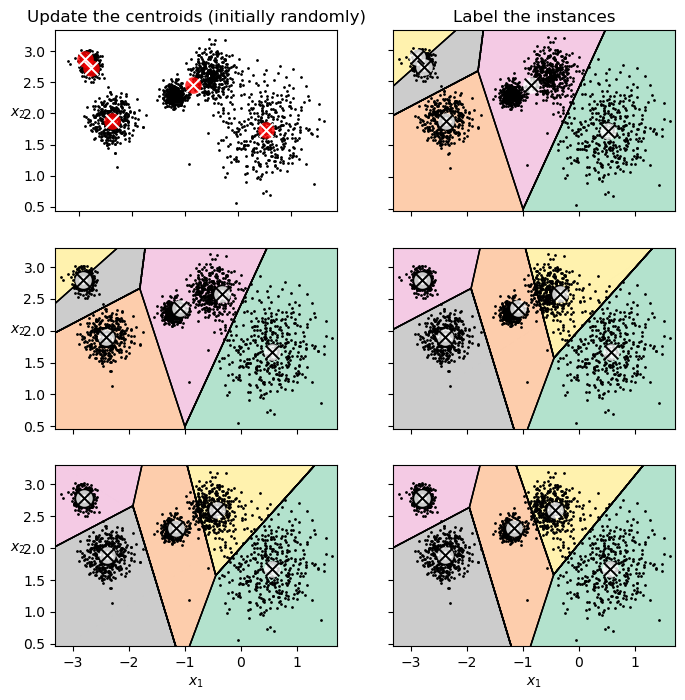

In [20]:
kmeans_iter1=KMeans(n_clusters=5,init="random",max_iter=1,random_state=42)
kmeans_iter2=KMeans(n_clusters=5,init="random",max_iter=2,random_state=42)
kmeans_iter3=KMeans(n_clusters=5,init="random",max_iter=3,random_state=42)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_,circle_color="r",cross_color="w")
plt.ylabel("$x_2$",rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1,X,show_xlabels=False,show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1,X,show_centroids=False,show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2,X,show_xlabels=False,show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2,X,show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3,X,show_ylabels=False)

### K-Means Variability

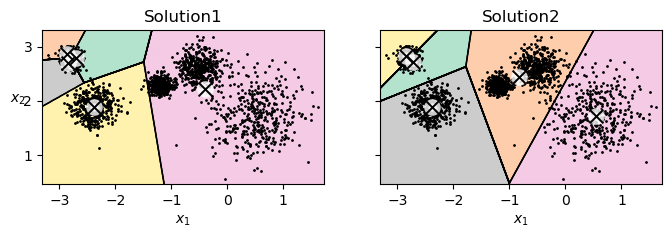

In [22]:
def plot_clusterer_comparision(cluster1,cluster2,X,title1=None,title2=None):
    cluster1.fit(X)
    cluster2.fit(X)

    plt.figure(figsize=(8,2))
    plt.subplot(121)
    plot_decision_boundaries(cluster1,X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(cluster2,X,show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rand_init1=KMeans(n_clusters=5,init="random",n_init=1,random_state=3)
kmeans_rand_init2=KMeans(n_clusters=5,init="random",n_init=1,random_state=11)

plot_clusterer_comparision(kmeans_rand_init1,kmeans_rand_init2,X,"Solution1","Solution2")
plt.show()

In [39]:
good_init=np.array([[0.5,1.7],[-0.5,2.6],[-2.4,1.9],[-2.8,2.8],[-1.2,2.3]])
kmeans=KMeans(n_clusters=5,init=good_init,n_init=1,random_state=42)
kmeans.fit(X)

KMeans(init=array([[ 0.5,  1.7],
       [-0.5,  2.6],
       [-2.4,  1.9],
       [-2.8,  2.8],
       [-1.2,  2.3]]),
       n_clusters=5, n_init=1, random_state=42)

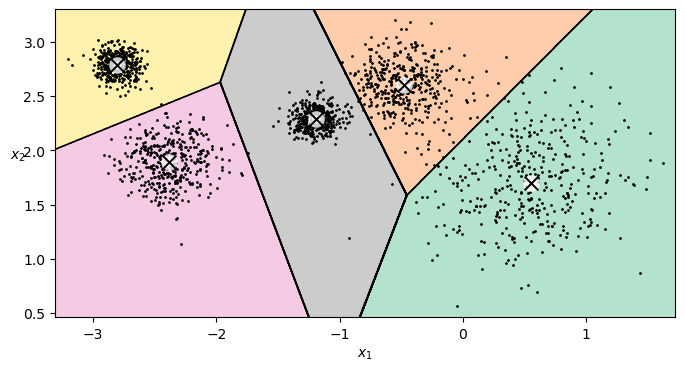

In [41]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

In [43]:
kmeans.inertia_

199.70913501878113

In [47]:
kmeans.score(X)

-199.70913501878115

In [49]:
kmeans_rand_init1.inertia_

959.0525104170717

In [51]:
kmeans_rand_init2.inertia_

321.11373330092124

In [71]:
X_dist=kmeans.transform(X)
len(X_dist)


2000

In [73]:
kmeans.labels_

array([1, 4, 2, ..., 2, 3, 1], dtype=int32)

In [91]:
(X_dist[np.arange(len(X_dist)),kmeans.labels_]**2).sum()

199.7091350187809